In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [156]:
# import and read dataset

df = pd.read_csv("score_updated.csv")

In [157]:
# Return first n rows of the Dataframe
df.head(n=5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [158]:
# Get the dimensionality of the DataFrame

df.shape

(96, 2)

In [159]:
# concise summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [160]:
# generate descriptive statistics

df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


Text(0, 0.5, 'Mark')

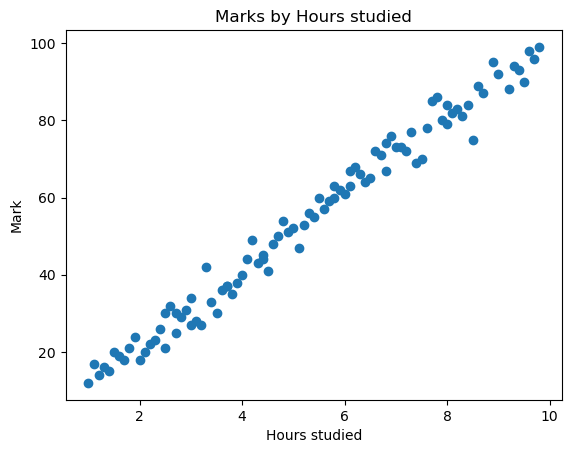

In [161]:
# plot the data

x_values = np.array(df["Hours"])
y_values = np.array(df["Scores"])

plt.scatter(x=x_values, y=y_values)
plt.title("Marks by Hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Mark")

In [162]:
# fit the model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [163]:
# split the dataset into training set and test set

X = df['Hours']
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [164]:
# Reshape X_train
X_train = np.array(X_train)
X_train_reshaped = X_train.reshape(-1, 1)
X_train_reshaped

array([[3.9],
       [5.5],
       [5.8],
       [5.8],
       [7.4],
       [5.6],
       [4.2],
       [7. ],
       [3.3],
       [7.8],
       [8.5],
       [1.9],
       [5.3],
       [8.3],
       [1.2],
       [9.2],
       [3.4],
       [7.1],
       [4. ],
       [8.4],
       [8. ],
       [2.4],
       [3.7],
       [2.8],
       [8.2],
       [8. ],
       [1.4],
       [9.3],
       [6.1],
       [9.7],
       [9.4],
       [5.2],
       [1.3],
       [6. ],
       [1.7],
       [6.2],
       [9.8],
       [6.4],
       [2.1],
       [7.2],
       [6.3],
       [4.7],
       [5.1],
       [6.6],
       [4.8],
       [3.2],
       [6.9],
       [2. ],
       [2.9],
       [6.8],
       [1. ],
       [2.7],
       [7.6],
       [6.5],
       [1.1],
       [4.4],
       [7.9]])

In [165]:
y_train

34    38
7     60
91    60
27    63
19    69
78    57
25    49
89    73
13    42
24    86
3     75
17    24
38    56
8     81
75    14
6     88
62    33
36    73
84    40
56    84
95    84
54    26
43    37
50    29
65    83
46    79
66    15
61    94
93    63
76    96
41    93
58    53
48    16
83    61
57    18
32    68
90    99
59    64
63    20
81    72
37    66
29    50
1     47
52    72
21    54
2     27
23    76
87    18
74    31
86    67
82    12
20    30
60    78
71    65
14    17
92    44
51    80
Name: Scores, dtype: int64

In [166]:
lm = LinearRegression()

In [167]:
lm.fit(X_train_reshaped, y_train)

LinearRegression()

In [168]:
# Get model function slope and intercept

slope = lm.coef_[0]
intercept = lm.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 9.72528447949711
Intercept: 2.8752122076384694


1.0 9.8


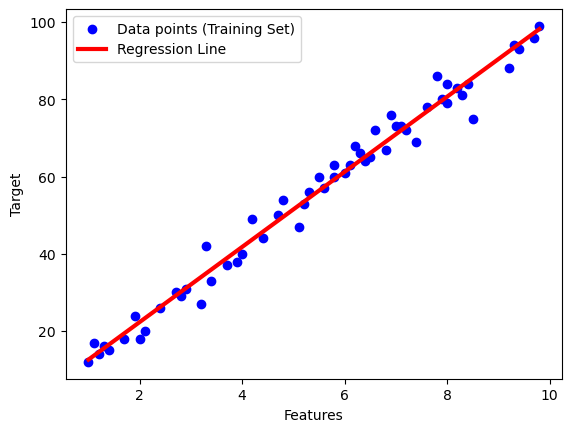

In [169]:
# Plot the model function and training set points

min_x_value = X_train_reshaped.min()
max_x_value = X_train_reshaped.max()

print(min_x_value, max_x_value)

# Create a sequence of numbers to plot our model line

x_values = np.linspace(start=min_x_value, stop=max_x_value, num=100)
y_values = slope * x_values + intercept # line equation

plt.scatter(X_train_reshaped, y_train, color='blue', label='Data points (Training Set)')

# Plot the line
plt.plot(x_values, y_values, color='red', label='Regression Line', linewidth=3)

plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()

In [170]:
# Predictions

X_test_reshaped = np.array(X_test).reshape(-1, 1) # reshape X_test

y_pred = lm.predict(X_test_reshaped)

In [171]:
y_pred

array([28.16095185, 50.52910616, 32.05106565, 38.85876478, 81.65001649,
       86.51265873, 75.8148458 , 68.03461822, 27.18842341, 77.7599027 ,
       55.3917484 , 18.43566737, 62.19944753, 36.91370789, 90.40277252,
       95.26541476, 46.63899237, 39.83129323, 37.88623633, 51.50163461,
       20.38072427, 96.23794321, 89.43024408, 69.00714667, 32.05106565,
       29.1334803 , 45.66646392, 60.25439064, 42.74887857, 47.61152081,
       25.24336651, 87.48518718, 44.69393547, 17.46313893, 73.86978891,
       58.30933374, 24.27083806, 27.18842341, 33.02359409])

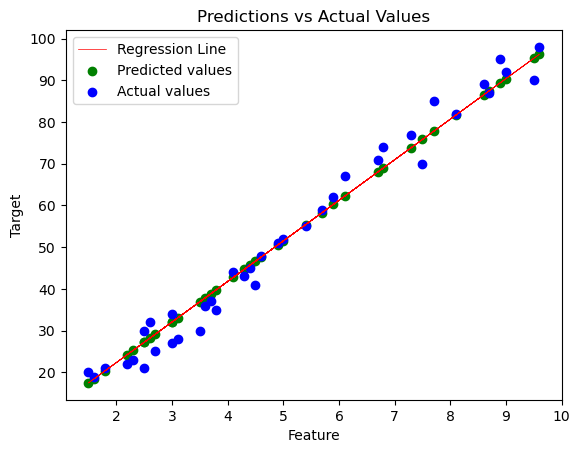

In [172]:
# get values for regression line

y_values = slope * X_test + intercept

plt.plot(X_test, y_values, color='red', label='Regression Line', linewidth=0.5)

# Plot line, y_pred and y_test

plt.scatter(X_test, y_pred, color='green', label='Predicted values')
plt.scatter(X_test, y_test, color='b', label='Actual values')

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Predictions vs Actual Values")
plt.legend()

In [173]:
# Evaluate the model using mean squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

12.635247068338263

In [178]:
# How does MSE metric change based on test_size parameter in train_test_split?

test_size_values = [0.2, 0.3, 0.4, 0.5]

for value in test_size_values:
    X = df[['Hours']] # 2D array
    y = df['Scores']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=42)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    print(f"Test size: {value} --> MSE: {mse}")

Test size: 0.2 --> MSE: 17.007444250866516
Test size: 0.3 --> MSE: 14.603843075774636
Test size: 0.4 --> MSE: 12.635247068338263
Test size: 0.5 --> MSE: 13.35878848058569
